# NLP Part 1

### _Sentiment analysis and word cloud_


In this notebook, I will be performing analysis on textual data. This notebook divided into two parts and part 2 notebook can be found [here](https://nbviewer.jupyter.org/github/datA2Z/All-about-data-science-and-AI/blob/master/Natural%20language%20processing/Natural%20language%20processing%20part%202.ipynb) and Dataset used in This notebook can be download from [here](https://www.dropbox.com/s/wc6rzl1a2os721d/yelp.csv?dl=0) 




#### The dataset

Our data contains 10,000 reviews, with the following information for each one:

***business_id*** : (ID of the business being reviewed)<br>
***date*** : (Day the review was posted)<br>
***review_id*** : (ID for the posted review)<br>
***stars*** : (1–5 rating for the business)<br>
***text*** : (Review text)<br>
***type*** : (Type of text)<br>
***user_id*** : (User’s id)<br>
***{cool / useful / funny}*** : (Comments on the review, given by other users)

Let’s see how we can go about analysing this dataset. Lets code...

In [2]:
# Import require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir("F:/portfolio/NLP/Sentiment analysis/Data")

In [4]:
# Load data 
yelp = pd.read_csv('yelp.csv')

Let’s get some basic information about the data. The .shape method tells us the number of rows and columns in the dataframe.

In [5]:
# Lets Check shape
yelp.shape

(10000, 10)

We can learn more using .head(), .info().

In [6]:
# Lets Look into data
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
# Data Exploration
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [8]:
yelp['text length'] = yelp['text'].apply(len)

In [9]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


We can now see the text length column in our dataframe using .head():

### Exploring the dataset
Let’s visualise the data a little more by plotting some graphs with the Seaborn library.

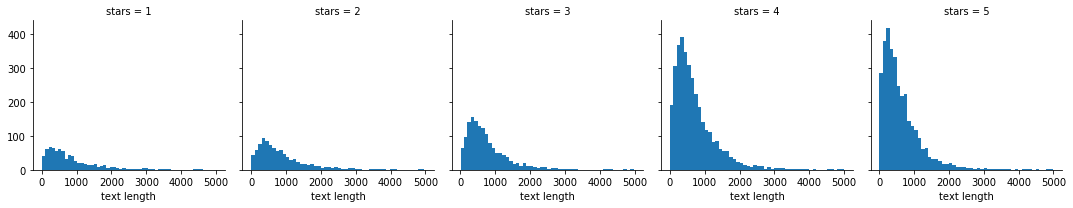

In [10]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

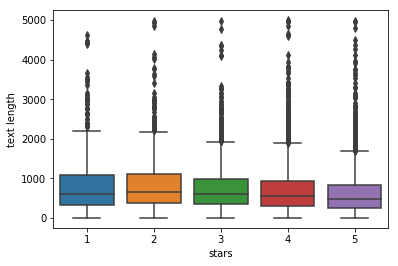

In [11]:
# let’s create a box plot of the text length for each star rating.
sns.boxplot(x='stars', y='text length', data=yelp)

From the plot, looks like the 1-star and 2-star ratings have much longer text, but there are many outliers (which can be seen as points above the boxes).

Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr() method from Pandas to find any correlations in the dataframe.

In [12]:
stars = yelp.groupby('stars').mean()
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


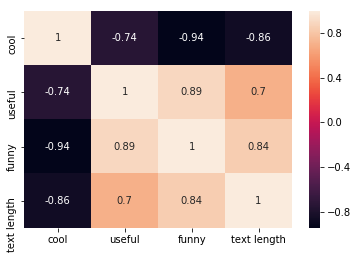

In [13]:
# o visualise these correlations, we can use Seaborn’s heatmap
sns.heatmap(data=stars.corr(), annot=True)

Looking at the map, funny is strongly correlated with useful, and useful seems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

## Sentiment analysis

Lets perform sentiment analysis on text column using Textblob library.

In [15]:
# Create blank column in yelp dataframe
yelp['Sentiment'] = 'NA'

# Loop over text column of yelp dataframe 
for i in range(0,len(yelp)):
    t = TextBlob(yelp['text'][i]).sentiment.polarity
    if t < 0:
        yelp.set_value(i,'Sentiment','Negative')
    elif t == 0:
        yelp.set_value(i,'Sentiment','Neutral')
    else :
        yelp.set_value(i,'Sentiment','Positive')

In [16]:
# Now we can see Sentiment column with its Sentiment lable 
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length,Sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,Positive
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,Positive
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,Positive
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,Positive
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,Positive


Create two dataframes and assign all positive and negative reviews into it.

In [17]:
pos = yelp.loc[yelp['Sentiment'] == "Positive"]
neg = yelp.loc[yelp['Sentiment'] == "Negative"]

In [18]:
# lets check Positive and Negative reviews dataframes
pos.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length,Sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,Positive
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,Positive
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,Positive
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,Positive
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,Positive


In [19]:
neg.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length,Sentiment
15,Vb9FPCEL6Ly24PNxLBaAFw,2011-03-20,HvqmdqWcerVWO3Gs6zbrOw,2,Was it worth the 21$ for a salad and small piz...,review,ylWOj2y7TV2e3yYeWhu2QA,0,2,0,705,Negative
16,supigcPNO9IKo6olaTNV-g,2008-10-12,HXP_0Ul-FCmA4f-k9CqvaQ,3,We went here on a Saturday afternoon and this ...,review,SBbftLzfYYKItOMFwOTIJg,3,4,2,1469,Negative
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594,Negative
24,JhupPnWfNlMJivnWB5druA,2011-05-22,cFtQnKzn2VDpBedy_TxlvA,5,I love this place! I have been coming here for...,review,13xj6FSvYO0rZVRv5XZp4w,0,1,0,294,Negative
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361,Negative


# Creating word clouds

Frist, We removed stopwords from dataframes. A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore.

In [20]:
# Load stops words from NLTK library
stopwords = set(STOPWORDS)

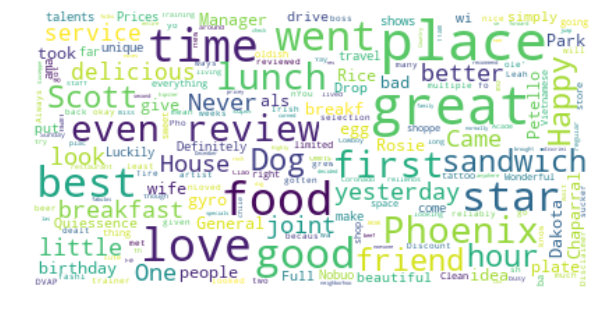

In [21]:
# Funcation to create word cloud for positive feedbacks
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(pos['text']))

print(wordcloud)
plt.figure(figsize = (10, 18), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

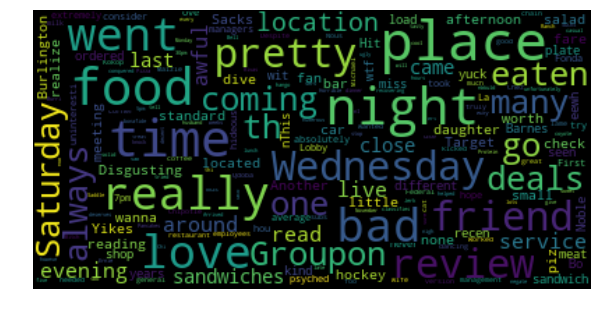

In [22]:
# Funcation to create word cloud for negative feedbacks
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(neg['text']))

print(wordcloud)


plt.figure(figsize = (10, 18), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can see from both wordclouds in positive words like "food", "sandwich", "time" customers are discussed. on the other hand words like  "bad", "Wednesday", "place" customers are discussed.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the part two of this notebook.**